In [2]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Vishal\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Vishal\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\Vishal\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
import warnings  
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Credit Card Customer Data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [9]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [10]:
df.duplicated().sum()

0

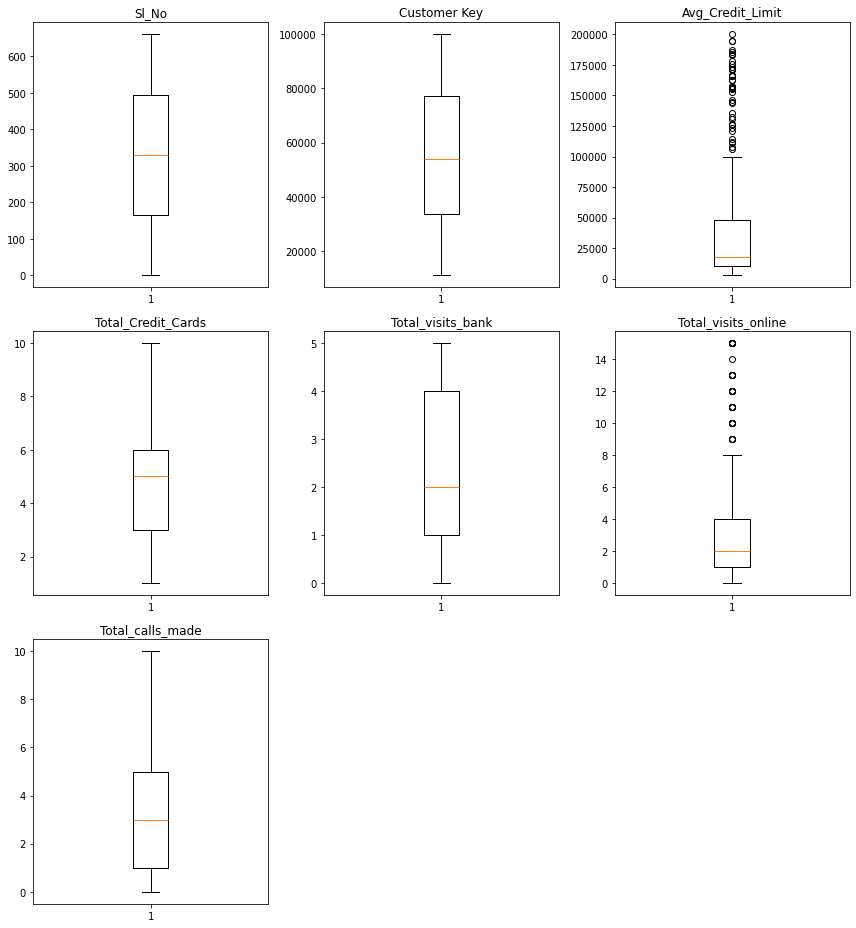

In [11]:
# Outliers
import matplotlib.pyplot as plt
import seaborn as sns

columns = df.columns
fig, axes = plt.subplots(nrows =3, ncols =3, figsize= (12, 13))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    
for j in range(len(columns), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [12]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df [field_name], 75)) ].index, inplace=True) 
    df.drop(df[df[field_name] < (np.percentile(df [field_name], 25) - iqr)].index, inplace=True)

In [13]:
outliers_cols =['Avg_Credit_Limit', 'Total_visits_online']
    
for col in outliers_cols:
    drop_outliers(df, col)

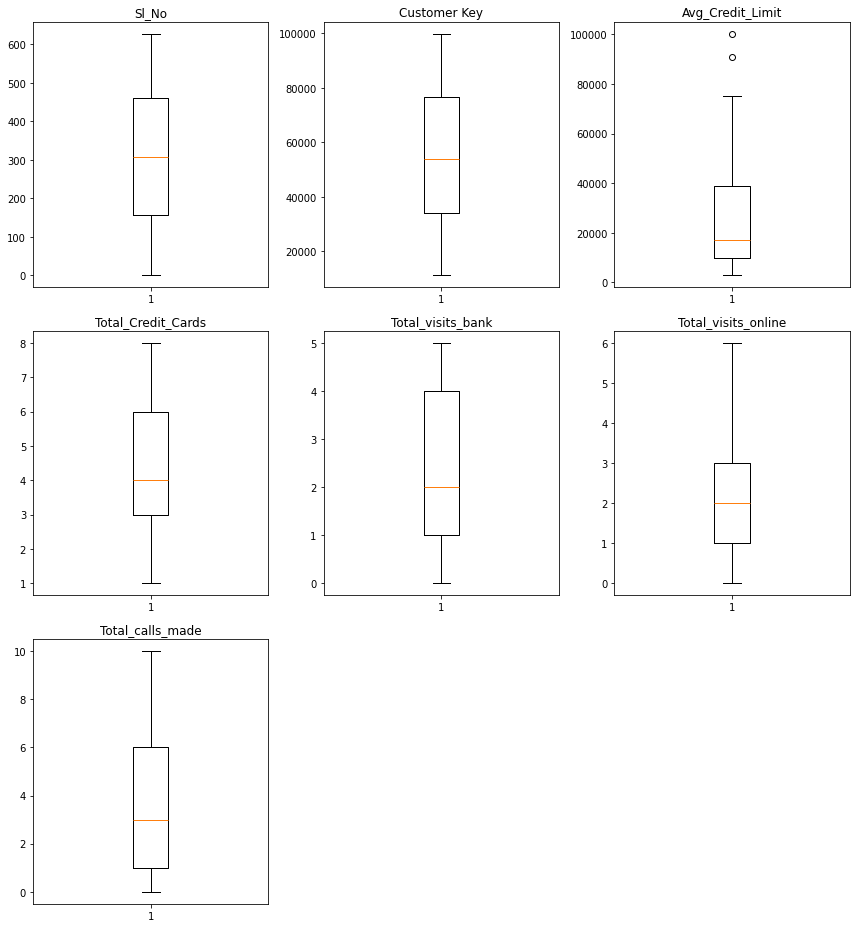

In [14]:
fig, axes = plt.subplots(nrows =3, ncols =3, figsize= (12, 13))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    
for j in range(len(columns), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

# Analysing and Visualizing

In [15]:
df['Total_interaction']= df['Total_calls_made'] + df['Total_visits_online'] + df['Total_visits_bank']

In [16]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_interaction
0,1,87073,100000,2,1,1,0,2
2,3,17341,50000,7,1,3,4,8
3,4,40496,30000,5,1,1,4,6
5,6,58634,20000,3,0,1,8,9
7,8,37376,15000,3,0,1,1,2


In [17]:
mean_cl = round(df['Avg_Credit_Limit'].mean(), 2)

higher_mean_cl = df[df['Avg_Credit_Limit'] > mean_cl]
below_mean_cl = df[df['Avg_Credit_Limit'] < mean_cl]
print('The number of records higher than mean credit score:', higher_mean_cl.shape[0])
print('The number of records below than mean credit score:', below_mean_cl.shape[0])

The number of records higher than mean credit score: 219
The number of records below than mean credit score: 391


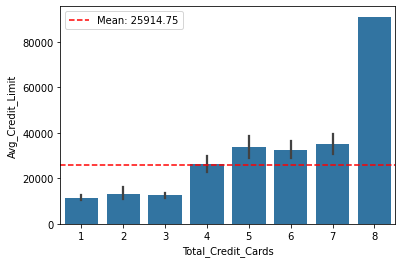

,Total_Credit_Cards,Avg_Credit_Limit
0,1,11457.63
1,2,13187.50
2,3,12596.15
3,4,26311.26
4,5,33794.52
5,6,32629.31
6,7,35287.23
7,8,91000.00


In [18]:
sns.barplot(data = df,x = df["Total_Credit_Cards"], y = df["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Mean: {mean_cl:.2f}')
plt.legend()
plt.show()
d = round(df.groupby('Total_Credit_Cards')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

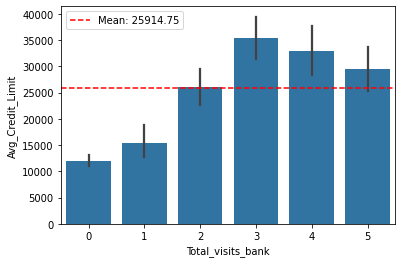

,Total_visits_bank,Avg_Credit_Limit
0,0,12050.63
1,1,15385.54
2,2,26050.63
3,3,35300.00
4,4,33000.00
5,5,29561.22


In [19]:
sns.barplot(data = df,x = df["Total_visits_bank"], y = df["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Mean: {mean_cl:.2f}')
plt.legend()

plt.show()
d = round(df.groupby('Total_visits_bank')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

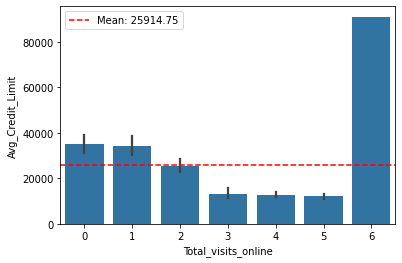

,Total_visits_online,Avg_Credit_Limit
0,0,35131.94
1,1,34091.74
2,2,25523.81
3,3,13272.73
4,4,12739.13
5,5,12129.63
6,6,91000.00


In [20]:
sns.barplot(data = df,x = df["Total_visits_online"], y = df["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Mean: {mean_cl:.2f}')
plt.legend()

plt.show()
d = round(df.groupby('Total_visits_online')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

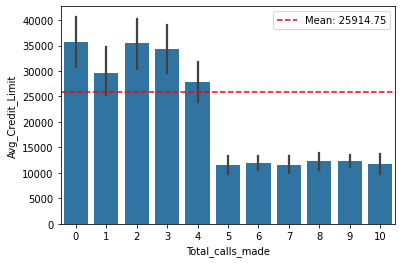

,Total_calls_made,Avg_Credit_Limit
0,0,35604.94
1,1,29671.05
2,2,35520.55
3,3,34329.27
4,4,27787.04
5,5,11482.76
6,6,11897.44
7,7,11571.43
8,8,12300.00
9,9,12322.58


In [21]:
sns.barplot(data = df,x = df["Total_calls_made"], y = df["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Mean: {mean_cl:.2f}')
plt.legend()

plt.show()

d = round(df.groupby('Total_calls_made')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

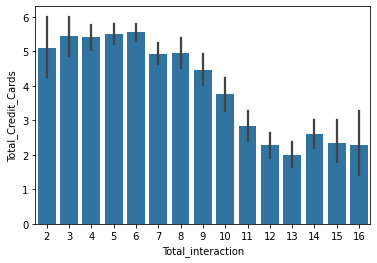

In [22]:
sns.barplot(data = df,x = df["Total_interaction"], y = df["Total_Credit_Cards"])

plt.show()

In [23]:
X = df.drop(['Sl_No', 'Customer Key'], axis=1).reset_index()

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Modeling

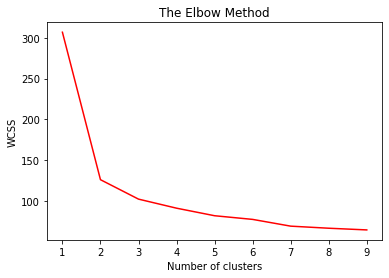

In [25]:
from sklearn.cluster import KMeans
wcss=[]

# asumsi jumlah K berada di antara 1 sampai 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

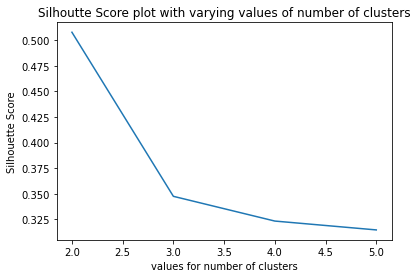

In [26]:
from sklearn.metrics import silhouette_score

sil_score = []
i_range = []
for i in range (2,6):
    kmeans = KMeans(n_clusters=i, random_state = 42).fit(X)
    t = silhouette_score(X, kmeans.labels_)
    sil_score.append(t)
    i_range.append(i)
p = sns.lineplot(x = i_range, y = sil_score)
p.set_xlabel("values for number of clusters")
p.set_ylabel("Silhouette Score")
p.set_title("Silhoutte Score plot with varying values of number of clusters")
plt.show()

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
# fitting input data
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [28]:
df['Cluster'] = labels
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_interaction,Cluster
0,1,87073,100000,2,1,1,0,2,0
2,3,17341,50000,7,1,3,4,8,1
3,4,40496,30000,5,1,1,4,6,2
5,6,58634,20000,3,0,1,8,9,1
7,8,37376,15000,3,0,1,1,2,2


In [29]:
centroids

array([[0.80381481, 0.49150439, 0.65145503, 0.68148148, 0.16358025,
        0.2037037 , 0.31613757],
       [0.18635676, 0.09468747, 0.2027027 , 0.18738739, 0.59009009,
        0.68873874, 0.66891892],
       [0.49495814, 0.09835771, 0.6345515 , 0.7127907 , 0.16763566,
        0.19418605, 0.32225914]])

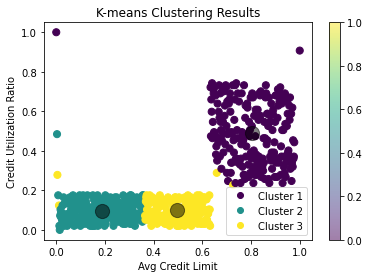

In [30]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.xlabel('Avg Credit Limit')
plt.ylabel('Credit Utilization Ratio')
plt.title('K-means Clustering Results')
plt.colorbar()